In [144]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import scipy
from matplotlib import pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

url = "https://kworb.net/spotify/listeners.html"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

table = soup.find("table")
artists = []
listeners = []
daily_trend = []
peak = []
pk_listeners = []
max_rows = 200
current_row = 0

for row in table.find_all("tr")[1:]:
    columns = row.find_all("td")
    artists.append(columns[0].text.strip())
    listeners.append(int(columns[1].text.replace(",", "").strip()))
    daily_trend_value = columns[2].text.strip().replace(",", "").replace("+", "").replace("-", "")
    daily_trend.append(int(daily_trend_value))
    peak.append(int(columns[3].text.strip()))
    pk_listeners.append(int(columns[4].text.replace(",", "").strip()))
    current_row += 1
    if current_row >= max_rows:
        break

Data Retrieval: I started by importing the necessary libraries, such as requests, BeautifulSoup, pandas, and others. Then, I set the url variable to "https://kworb.net/spotify/listeners.html," which is the web page I wanted to scrape for data. The website displays the US Spotify Monthly Listeners every day.

Web Scraping: I used the requests library to send an HTTP GET request to the specified URL and stored the response. After that, I employed BeautifulSoup to parse the HTML content of the response. This parsing step makes it easier to navigate and extract the specific data I needed.

Data Collection: I identified the HTML table within the web page that contains the data of interest.

Data Preparation: To hold the extracted data, I initialized several empty lists, including "artists," "listeners," "daily_trend," "peak," and "pk_listeners."

Data Extraction: I then iterated through the rows of the HTML table, excluding the header row. In each iteration, I extracted data from specific columns within the table. The data I collected included the artist's name, number of listeners, daily trend, peak position, and peak listeners.

Data Transformation:
For "listeners" and "peak listeners," I removed commas and converted the values to integers.

For "daily trend," I first removed commas, and I also handled the presence of '+' or '-' signs to ensure the values could be converted to integers.

Data Limitation: I kept track of the number of rows I processed using the "current_row" variable, and I made sure to stop the iteration when it reached the limit set by "max_rows."

In [145]:
artists_df = pd.DataFrame({
    "Artist": artists,
    "Listeners": listeners,
    "Daily Trend": daily_trend,
    "Peak Position": peak,
    "PeakListeners": pk_listeners
})

artists_df.to_csv("spotify_data.csv", index=False)

DataFrame Creation: I created a DataFrame named "artists_df." This DataFrame includes the columns for the artist's name ("Artist"), the number of listeners ("Listeners"), the daily trend in listeners ("Daily Trend"), the peak position on Spotify charts ("Peak Position"), and the number of peak listeners ("PeakListeners").

CSV File Creation: I exported it to a CSV file named "spotify_data.csv" to be able to use as a base when analyzing the dataset.

In [146]:
artists_df = pd.read_csv("spotify_data.csv")

artists_df.info()

artists_df.head(15)

statistics = artists_df.describe()
print(statistics)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         200 non-null    object
 1   Listeners      200 non-null    int64 
 2   Daily Trend    200 non-null    int64 
 3   Peak Position  200 non-null    int64 
 4   PeakListeners  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,Artist,Listeners,Daily Trend,Peak Position,PeakListeners
0,The Weeknd,105957407,94614,1,113034886
1,Taylor Swift,100597785,69472,2,101062829
2,Drake,80185887,551845,3,80185887
3,Rihanna,77222393,65581,2,80958750
4,Ed Sheeran,76345790,20779,2,87934910
5,Doja Cat,76220600,12440,5,76220600
6,Bad Bunny,75970446,307708,3,83950570
7,Justin Bieber,74031248,32003,6,75467229
8,Dua Lipa,71626990,243208,3,77778397
9,SZA,70275765,317327,9,70275765


          Listeners    Daily Trend  Peak Position  PeakListeners
count  2.000000e+02     200.000000     200.000000   2.000000e+02
mean   3.862502e+07   81641.955000      80.135000   4.233551e+07
std    1.512269e+07  101653.880319      50.653685   1.650487e+07
min    2.428003e+07     623.000000       1.000000   2.428003e+07
25%    2.778530e+07   25636.000000      40.000000   3.037885e+07
50%    3.313976e+07   53932.000000      74.000000   3.685802e+07
75%    4.633065e+07   92939.250000     115.250000   4.963110e+07
max    1.059574e+08  641098.000000     200.000000   1.130349e+08


DataFrame Loading: I load the "artists_df" DataFrame by reading data from the "spotify_data.csv" CSV file.

DataFrame Information: I use the info() method to display essential information about the DataFrame. This includes the data types of each column, the number of NA values, and memory usage. Using this, I knew I didn't need to remove the NA values.

DataFrame Head: I use the head(15) method to display the first 15 rows of the DataFrame. This provides a glimpse of the data and its structure, which is especially useful for a quick visual inspection.

Descriptive Statistics: I use the describe() method to get the statistics like count, mean, standard deviation, minimum, and maximum values for numerical columns.

<BarContainer object of 20 artists>

Text(0.5, 1.0, 'Top 20 Artists by Listeners')

Text(0.5, 0, 'Listeners')

Text(0, 0.5, 'Artist')

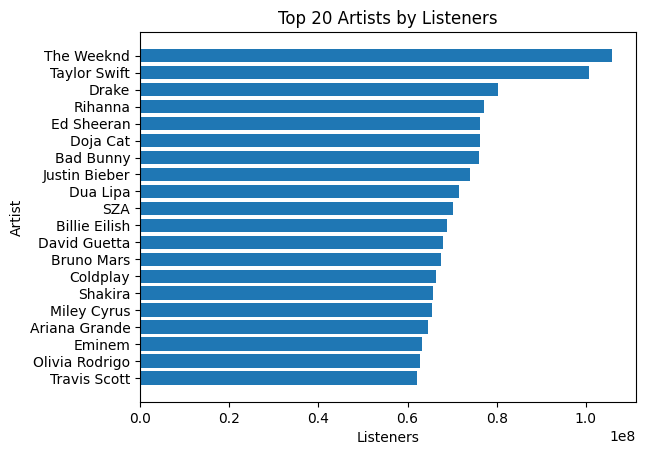

In [147]:
top_20_artists = artists_df.head(20)
plt.barh(top_20_artists['Artist'], top_20_artists['Listeners'])
plt.title('Top 20 Artists by Listeners')
plt.xlabel('Listeners')
plt.ylabel('Artist')
plt.gca().invert_yaxis()
plt.show()

The plotted bar chart shows the Top 20 Spotify Artists by Listener. I created a new DataFrame from the original artists_df for just the top 20 artists.
Observations:
This data is clearly displayed with the bar chart and it is clear to see which artists have the most listeners. The top 2 of The Weeknd and Taylor Swift are over 10 million listeners above the rest of the list while the rest don't have any big margins standing out.

<BarContainer object of 20 artists>

Text(0.5, 1.0, 'Top 20 Artists by Peak Listeners')

Text(0.5, 0, 'Listeners')

Text(0, 0.5, 'Artist')

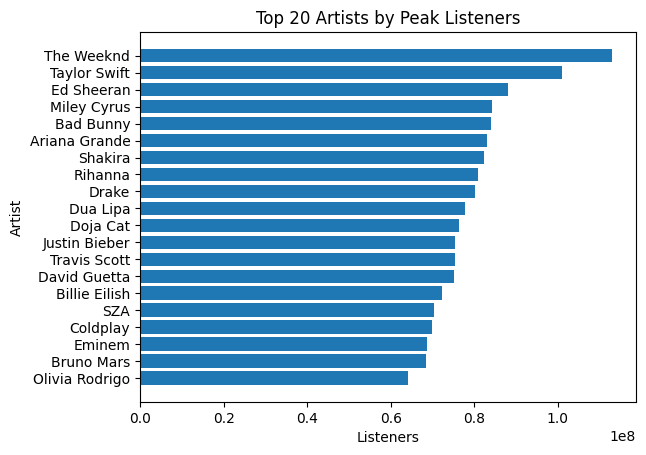

In [148]:
top_20_artists = top_20_artists.sort_values(by='PeakListeners', ascending=True)

plt.barh(top_20_artists['Artist'], top_20_artists['PeakListeners'])
plt.title('Top 20 Artists by Peak Listeners')
plt.xlabel('Listeners')
plt.ylabel('Artist')
plt.show()


Sorting: I sorted the "top_20_artists" DataFrame by the "PeakListeners" column in ascending order using the sort_values() method.
Bar Plot Creation: I created another horizontal bar plot using the sorted "top_20_artists" DataFrame and "Artist" column for the y-axis.
Observations:
The Top 20 Artists by Peak Listeners has some similarities as the previous graph using current Listeners such as the top 2 artists being The Weeknd and Taylor Swift. However, there are a few differences after that with many shifts, showing how there could be change based on artists' current albums/songs being released.

Text(0.5, 1.0, 'Daily Trend vs. Peak Position')

Text(0.5, 0, 'Daily Trend')

Text(0, 0.5, 'Peak Position')

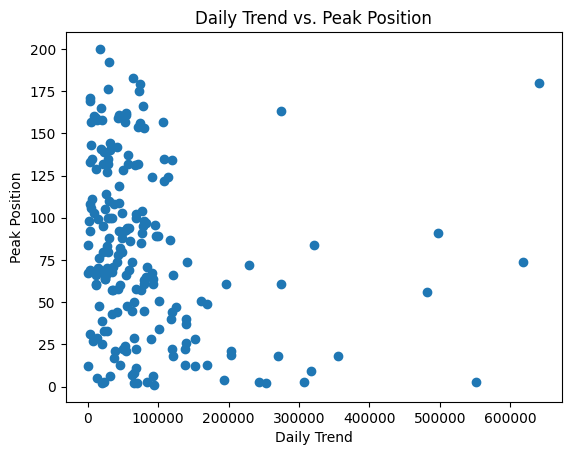

In [149]:
plt.scatter(artists_df['Daily Trend'], artists_df['Peak Position'])
plt.title('Daily Trend vs. Peak Position')
plt.xlabel('Daily Trend')
plt.ylabel('Peak Position')
plt.show()

I created a Scatter Plot using the entire artists_df DataFrame and chose my x-axis to be Daily Trend which is how much an artist's monthly listeners changed within the last day. The y-axis is the Peak Position. I chose to plot these 2 variables because I hypothesized that the artists in the higher spots have less variety and changes.
Observations:
However, the data in the scatter plot is scattered randomly with some artists having a greater daily trend than others. This concludes that there is little to no connection between the 2 variables.